# **New GANs**

In [ ]:
!pip install sdv
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.8/73.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8

In [ ]:
import pandas as pd
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sdv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Graduation/creditcard (1).csv')
data["index"]=range(0, len(data))

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,index
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,2
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,3
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4


Class Ratios:
 Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


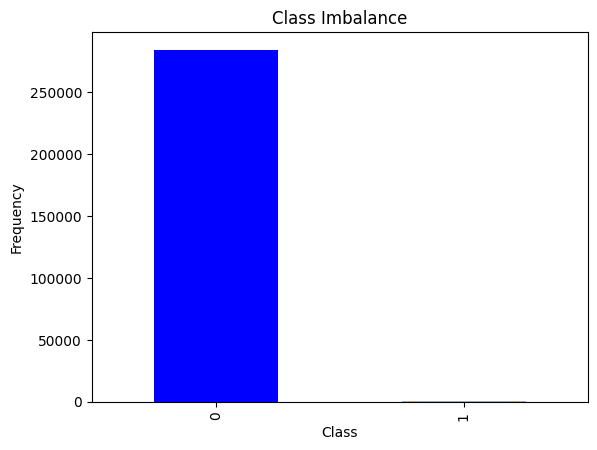

In [ ]:
ratios = data['Class'].value_counts(normalize=True)
data['Class'].value_counts().plot(kind='bar', color=['blue', 'orange'])
print("Class Ratios:\n", ratios)
plt.title('Class Imbalance')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
fraud_data = data[data['Class'] == 1]
non_fraud_data = data[data['Class'] == 0]

print("Fraud Data Shape:", fraud_data.shape)
print("Non-Fraud Data Shape:", non_fraud_data.shape)

Fraud Data Shape: (492, 32)
Non-Fraud Data Shape: (284315, 32)


## **GANs**

In [ ]:
# Import necessary libraries
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
import pandas as pd
from sdv.evaluation.single_table import QualityReport
from sdv.evaluation.single_table import DiagnosticReport

In [ ]:
metadata = SingleTableMetadata()

metadata.add_column('index', sdtype='id')
metadata.add_column('Time', sdtype='time_series')
metadata.add_column('V1', sdtype='numerical')
metadata.add_column('V2', sdtype='numerical')
metadata.add_column('V3', sdtype='numerical')
metadata.add_column('V4', sdtype='numerical')
metadata.add_column('V5', sdtype='numerical')
metadata.add_column('V6', sdtype='numerical')
metadata.add_column('V7', sdtype='numerical')
metadata.add_column('V8', sdtype='numerical')
metadata.add_column('V9', sdtype='numerical')
metadata.add_column('V10', sdtype='numerical')
metadata.add_column('V11', sdtype='numerical')
metadata.add_column('V12', sdtype='numerical')
metadata.add_column('V13', sdtype='numerical')
metadata.add_column('V14', sdtype='numerical')
metadata.add_column('V15', sdtype='numerical')
metadata.add_column('V16', sdtype='numerical')
metadata.add_column('V17', sdtype='numerical')
metadata.add_column('V18', sdtype='numerical')
metadata.add_column('V19', sdtype='numerical')
metadata.add_column('V20', sdtype='numerical')
metadata.add_column('V21', sdtype='numerical')
metadata.add_column('V22', sdtype='numerical')
metadata.add_column('V23', sdtype='numerical')
metadata.add_column('V24', sdtype='numerical')
metadata.add_column('V25', sdtype='numerical')
metadata.add_column('V26', sdtype='numerical')
metadata.add_column('V27', sdtype='numerical')
metadata.add_column('V28', sdtype='numerical')
metadata.add_column('Amount', sdtype='numerical')
metadata.add_column('Class', sdtype='categorical')

In [ ]:
# Initialize and train CTGANSynthesizer
ctgan = CTGANSynthesizer(
    metadata=metadata,
    embedding_dim=256,
    generator_lr=2e-4,
    discriminator_lr=2e-4
)
ctgan.fit(fraud_data)

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:145: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:123: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [ ]:
# Generate synthetic data
synthetic_data = ctgan.sample(170000)

In [ ]:
# Convert metadata to dictionary for evaluation
metadata_dict = metadata.to_dict()

In [ ]:
# Evaluate Quality
quality_report = QualityReport()
quality_report.generate(fraud_data, synthetic_data, metadata_dict)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 32/32 [00:00<00:00, 90.14it/s]|
Column Shapes Score: 71.66%

(2/2) Evaluating Column Pair Trends: |██████████| 496/496 [00:09<00:00, 51.12it/s]|
Column Pair Trends Score: 84.96%

Overall Score (Average): 78.31%



In [ ]:
# Print available properties
print("\nAvailable Quality Properties:\n", quality_report.get_properties())


Available Quality Properties:
              Property     Score
0       Column Shapes  0.716634
1  Column Pair Trends  0.849572


In [ ]:
# Evaluate Diagnostics
diagnostic_report = DiagnosticReport()
diagnostic_report.generate(data, synthetic_data, metadata_dict)
print("\nAvailable ]iagnostic Properties:\n", diagnostic_report.get_properties())

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 32/32 [00:00<00:00, 49.20it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 213.73it/s]|
Data Structure Score: 93.94%

Overall Score (Average): 96.97%


Available ]iagnostic Properties:
          Property     Score
0   Data Validity  1.000000
1  Data Structure  0.939394


In [ ]:
df = pd.concat([fraud_data, synthetic_data, non_fraud_data])

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,index
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1,541
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1,623
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1,4920
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,6108
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1,6329


Class Ratios:
 Class
0    0.625133
1    0.374867
Name: proportion, dtype: float64


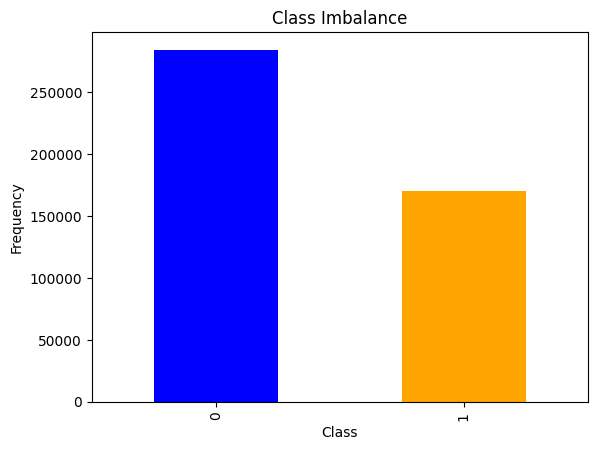

In [ ]:
ratios = df['Class'].value_counts(normalize=True)
df['Class'].value_counts().plot(kind='bar', color=['blue', 'orange'])
print("Class Ratios:\n", ratios)
plt.title('Class Imbalance')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()